# Libraries

In [1]:
import numpy as np
import scipy
from scipy import signal
import matplotlib.pyplot as plt
from pathlib import Path
import sys
import math

root = str(Path().resolve().parent)
if root not in sys.path:
    sys.path.append(root)
print(*sys.path, sep="\n")

# %matplotlib ipympl
%matplotlib inline

/usr/lib/python312.zip
/usr/lib/python3.12
/usr/lib/python3.12/lib-dynload

/home/ryanwtsai/repos/rfdsp_sim/python/venv/lib/python3.12/site-packages
/home/ryanwtsai/repos/rfdsp_sim/python


In [25]:
from importlib import reload
from rfdsppy import calc, ofdm, rf_analog, rf_tx_fw, tonegen, digital_filter_design, digital_hw_algo as dighw, rf_estimation as rf_est
from rfdsppy import rx_dfe_impcomp as rx_dfe

reload(calc)
reload(ofdm)
reload(rf_analog)
reload(rf_tx_fw)
reload(tonegen)
reload(digital_filter_design)
reload(dighw)
reload(rf_est)
reload(rx_dfe)

<module 'rfdsppy.rx_dfe_impcomp' from '/home/ryanwtsai/repos/rfdsp_sim/python/rfdsppy/rx_dfe_impcomp.py'>

# Rx FID RSB

Epsilon: 0.13089209181043143
Theta (deg): -0.04118168140720832
Expected SNR: 23.272403340446104 dB
EVM: 0.0 %
SNR: 308.86 dB


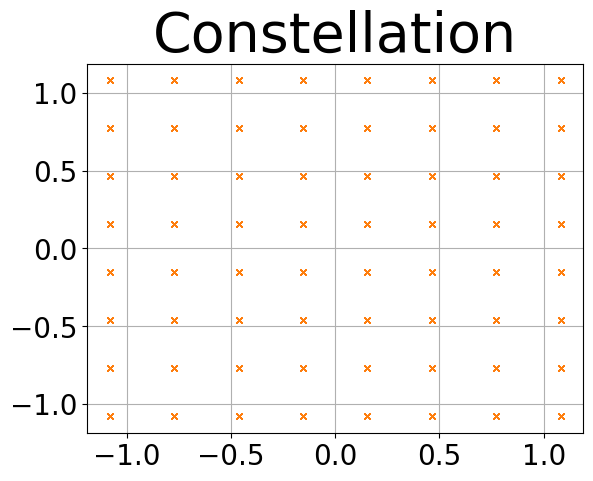

In [35]:
rng = np.random.default_rng()

bw = 20
scs = 15
modorder = 64
start_sc = 0
num_sc = 1200

wg = ofdm.OFDMWavGen(bw, scs, modorder, start_sc, num_sc)

ep = rng.uniform(low=-0.2, high=0.2)
theta = rng.uniform(low=-10*np.pi/180, high=10*np.pi/180)

iq_down = rf_analog.IQDownconverter(theta=theta, ep=ep)

gm = ep/2*np.cos(theta/2) + np.sin(theta/2)
gd = np.cos(theta/2) + ep/2*np.sin(theta/2)
coeff_img = -gm/gd
rx_iqmc = rx_dfe.RxIQMC(1, coeff_img)

x, x_standard = wg.generate(14*3)
cfg = wg.get_demod_params()
fs = cfg.get("fs")
wola_len = cfg.get("wola_len")

y = iq_down.transform(x)
y = rx_iqmc.transform(y)

evm = wg.calculate_evm(x[round(wola_len/2):], y[round(wola_len/2):], en_plot=True)
print(f"Epsilon: {ep}")
print(f"Theta (deg): {theta}")
print(f"Expected SNR: {10*np.log10(4/(ep**2+theta**2))} dB")
print(f"EVM: {round(evm,3)} %")
print(f"SNR: {round(-20*np.log10(evm/100), 2)} dB")